<a href="https://colab.research.google.com/github/jgumin/jupyter-notebook/blob/master/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly-Maps

https://plot.ly/python/maps/

In [0]:
!pip install plotly==4.1.1

In [0]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline
# %matplotlib nbagg
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]


# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

# #  display two pandas tables side by side
# from IPython.display import display, HTML
# CSS = """
# .output {
#     flex-direction: row;
# }
# """
# HTML('<style>{}</style>'.format(CSS))


# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# allow multiple outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# allow image input
from IPython.display import Image

In [0]:
Image('https://i.stack.imgur.com/ScJfR.png')


# Library Importing(plotly 4.1.1)

In [2]:
from plotly import __version__
print (__version__)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# Jupyter setup
# init_notebook_mode(connected=True)

import ipywidgets as widgets

4.1.1


In [0]:
import plotly
from plotly import tools

# plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Library Importing(plotly 3.6.1)

In [0]:
from plotly import __version__
print (__version__)
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Cufflinks wrapper on plotly
import cufflinks as cf

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

# set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)

# Jupyter setup
init_notebook_mode(connected=True)

import ipywidgets as widgets

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

# plotly 테마 설정

theming 참고1: https://medium.com/plotly/introducing-plotly-py-theming-b644109ac9c7<br>
theming 참고2: https://nbviewer.jupyter.org/github/jonmmease/plotly.py_release_notebooks/blob/master/notebooks/v3.4.0/templates-gapminder.ipynb <br>
기본theme설정/해제 참고: https://plot.ly/python/templates/#specifying-a-default-themes 

In [0]:
import plotly.io as pio
pio.templates.default = "plotly_white" # ['ggplot2', 'seaborn', 'plotly','plotly_white', 'plotly_dark','presentation', 'xgridoff', 'none']

# fig = go.Figure(layout={
#     'title' : 'Figure Title',
#     'font' : {'size': 15, 'family': 'Courier'}
# })

# templated_fig = pio.to_templated(fig)
# pio.templates['large_courier'] = templated_fig.layout.template

# pio.templates.default = 'large_courier'

## 파이썬 Python seaborn 으로 시각화 하기

출처: https://www.youtube.com/watch?v=8FZI3NhQk9Q&list=PLaTc2c6yEwmqvImLtEUWvfjYYLwfj--K3&index=3

seaborn lmplot 같은 통계적 수치를 가지는 데이터셋의 요약을 pandas의 describe와 corr으로 보기


### Anscombe's quartet 
"numerical calculations are exact, but graphs are rough."

* [Anscombe’s quartet — seaborn 0.9.0 documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)
* [Anscombe's quartet - Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
* [The Datasaurus Dozen - Same Stats, Different Graphs | Autodesk Research](https://www.autodeskresearch.com/publications/samestats)
 

In [0]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

In [6]:
df[df["dataset"] == "I"].corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


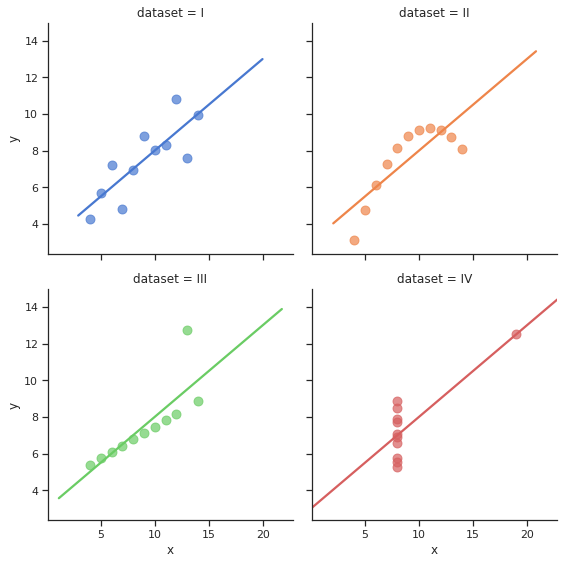

In [7]:
sns.lmplot(x="x", y="y", data=df, hue="dataset", col="dataset", col_wrap=2, 
           ci=None, palette="muted", height=4, scatter_kws={"s":80,"alpha":0.7})

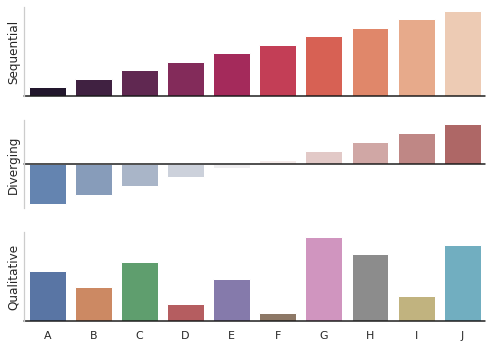

In [49]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

In [33]:
fig = make_subplots(rows=3, cols=1,vertical_spacing=2)

fig.add_trace(go.Bar(x=x, y=y1), row=1, col=1)

fig.update_traces(marker=dict(color=y1, cmax=15, cmin=0))
fig.update_layout(width=680)
fig.update_xaxes(showline=True, linewidth=1, linecolor="black", mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor="black", mirror=True)

In [18]:
fig=go.Figure(data=[go.Bar(x=x, y=y2)])
fig.update_traces(marker=dict(color=-y2, cmax=7.5, cmin=-7.5, colorscale='RdBu'))
                              # colorbar_dtick=1,colorscale='Viridis'))
fig.update_xaxes(showline=True, linewidth=1, linecolor="black", mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor="black", mirror=True)
fig.update_layout(width=680, shapes=[go.layout.Shape(
    type="line", x0=-0.5,x1=9.5,y0=0,y1=0,line_width=1)])

In [31]:
fig=go.Figure(data=[go.Bar(x=x, y=y3)])
fig.update_traces(marker=dict(color=y3))
fig.update_xaxes(showline=False, linewidth=1, linecolor="black", mirror=True)
fig.update_yaxes(showline=False, linewidth=1, linecolor="black", mirror=True)
fig.update_layout(width=680, 
#     shapes=[go.layout.Shape(type="line", x0=-0.5,x1=9.5,y0=0,y1=0,line_width=1)]
  )